In [1]:
#Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



# Modelo 1

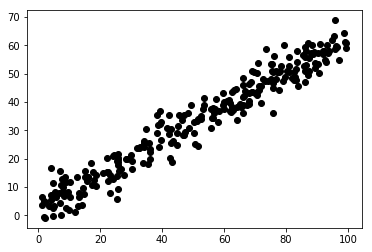

In [37]:
df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin.csv")

# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

plt.scatter(X_test, Y_test,  color='black')



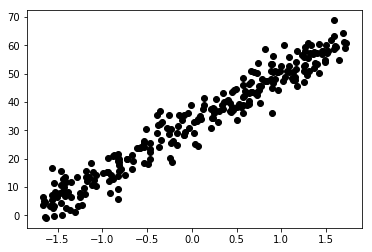

In [38]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

plt.scatter(X_test, Y_test,  color='black')

Coefficients:
[ 17.68316241]
Mean squared error: 17.22
Variance score: 0.95


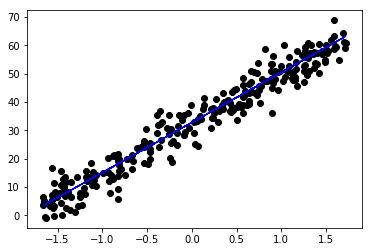

In [40]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

# Make predictions using the testing set
# The coefficients
print"Coefficients:"

print regr.coef_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

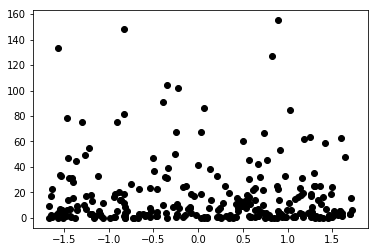

In [47]:
coef = regr.coef_
intercept = regr.intercept_
intercept
#coef[0]
err = np.zeros(len(X_test))

for i in range (0,len(X_test)):
    err[i] = math.pow(Y_test[i] - (coef*X_test[i] + intercept),2)
    
plt.scatter(X_test, err,  color='black')

plt.show()

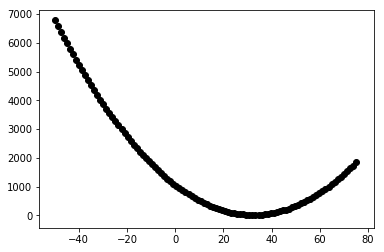

In [51]:
mediaS=np.mean(err, axis=0)
mediaS

arr = np.zeros((100,2))

#Parametros a mover para ver el minimo de la curva
w = np.linspace(-50,75,100)

errN = np.zeros(len(X_test))
i=0.0
aux = 0

while(i<100.0):
    arr[aux][0] = w[aux]
    for j in range (0,len(X_test)):
        errN[j] = math.pow(Y_test[j] - (coef*X_test[j] + arr[aux][0]),2)
    arr[aux][1]=np.mean(errN, axis=0)
    i = i+1.0
    aux = aux + 1

for i in range(0,len(arr)):
    x_err = arr[i][0]
    y_err = arr[i][1]
    plt.scatter(x_err, y_err,  color='black')



plt.show()


    

# Modelo 2

In [20]:
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin.csv")
df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin2.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin3.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin4.csv")
#df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLinPoli.csv")

In [21]:
# This data does not have headers so each attribute or field is simply enumerated
df.describe()


,X,y
count,1029.000000,1029.000000
mean,50.757989,2137.739358
std,29.708336,1870.369352
min,0.230225,0.272241
25%,22.870956,342.135840
50%,53.951080,1774.199681
75%,76.256816,3658.103897
max,99.831593,7133.608688


In [22]:
# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)


In [23]:
# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

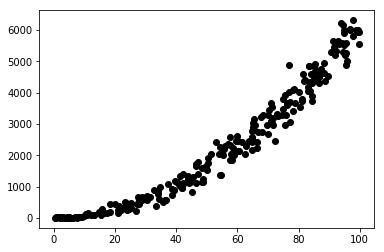

In [24]:
# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

plt.scatter(X_test, Y_test,  color='black')

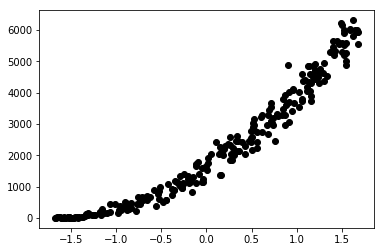

In [25]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

plt.scatter(X_test, Y_test,  color='black')

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [27]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients:
[ 1779.51618671]
Mean squared error: 287087.30
Variance score: 0.92


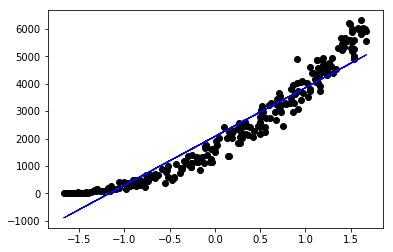

In [28]:
Y_pred = regr.predict(X_test)

# Make predictions using the testing set
# The coefficients
print"Coefficients:"

print regr.coef_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [29]:
coef = regr.coef_
intercept = regr.intercept_
intercept
#coef[0]

2074.4303161606526

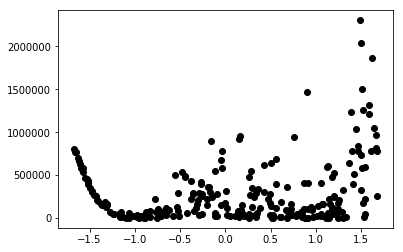

In [30]:
err = np.zeros(len(X_test))

for i in range (0,len(X_test)):
    err[i] = math.pow(Y_test[i] - (coef*X_test[i] + intercept),2)
    
plt.scatter(X_test, err,  color='black')

plt.show()


In [31]:
mediaS=np.mean(err, axis=0)
mediaS



287087.29570223892

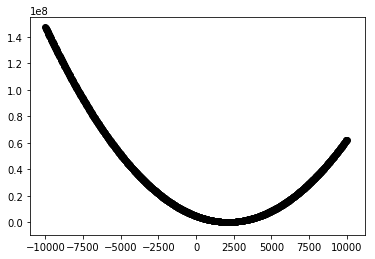

In [33]:
arr = np.zeros((1000,2))

#Parametros a mover para ver el minimo de la curva
w = np.linspace(-10000,10000,1000)

errN = np.zeros(len(X_test))
i=0.0
aux = 0

while(i<1000.0):
    arr[aux][0] = w[aux]
    for j in range (0,len(X_test)):
        errN[j] = math.pow(Y_test[j] - (coef*X_test[j] + arr[aux][0]),2)
    arr[aux][1]=np.mean(errN, axis=0)
    i = i+1.0
    aux = aux + 1

for i in range(0,len(arr)):
    x_err = arr[i][0]
    y_err = arr[i][1]
    plt.scatter(x_err, y_err,  color='black')



plt.show()


    
    



# Modelo 3

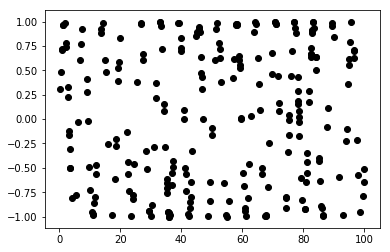

In [53]:
df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin3.csv")
# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

plt.scatter(X_test, Y_test,  color='black')

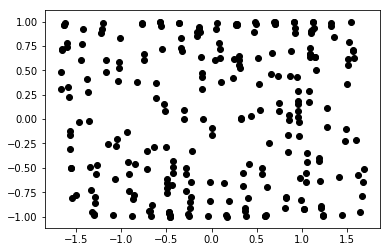

In [54]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

plt.scatter(X_test, Y_test,  color='black')

Coefficients:
[-0.06194204]
Mean squared error: 0.51
Variance score: -0.02


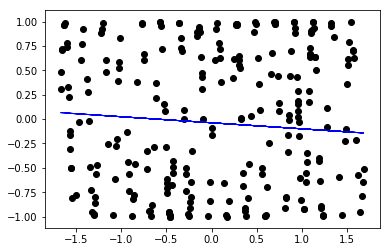

In [55]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

# Make predictions using the testing set
# The coefficients
print"Coefficients:"

print regr.coef_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

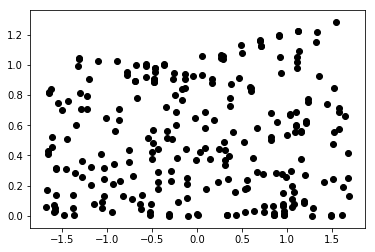

In [56]:
coef = regr.coef_
intercept = regr.intercept_
intercept
#coef[0]
err = np.zeros(len(X_test))

for i in range (0,len(X_test)):
    err[i] = math.pow(Y_test[i] - (coef*X_test[i] + intercept),2)
    
plt.scatter(X_test, err,  color='black')

plt.show()

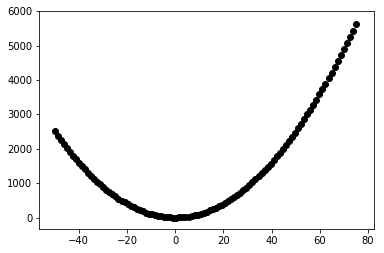

In [57]:
mediaS=np.mean(err, axis=0)
mediaS

arr = np.zeros((100,2))

#Parametros a mover para ver el minimo de la curva
w = np.linspace(-50,75,100)

errN = np.zeros(len(X_test))
i=0.0
aux = 0

while(i<100.0):
    arr[aux][0] = w[aux]
    for j in range (0,len(X_test)):
        errN[j] = math.pow(Y_test[j] - (coef*X_test[j] + arr[aux][0]),2)
    arr[aux][1]=np.mean(errN, axis=0)
    i = i+1.0
    aux = aux + 1

for i in range(0,len(arr)):
    x_err = arr[i][0]
    y_err = arr[i][1]
    plt.scatter(x_err, y_err,  color='black')



plt.show()


   

# Modelo 4

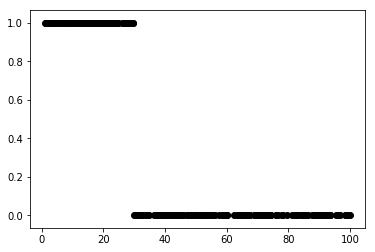

In [59]:
df = pd.read_csv("/Users/normalazo/Desktop/env1/Entrega3_LR/regLin4.csv")
# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

plt.scatter(X_test, Y_test,  color='black')

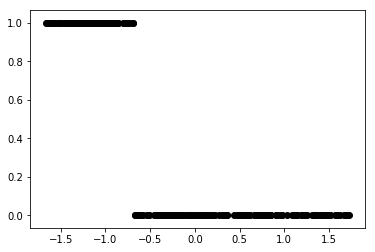

In [60]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

plt.scatter(X_test, Y_test,  color='black')

Coefficients:
[-0.37365174]
Mean squared error: 0.08
Variance score: 0.65


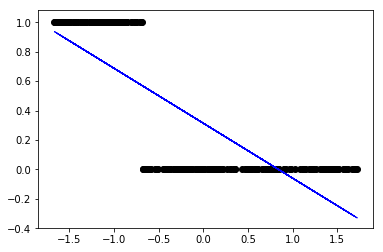

In [61]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

# Make predictions using the testing set
# The coefficients
print"Coefficients:"

print regr.coef_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

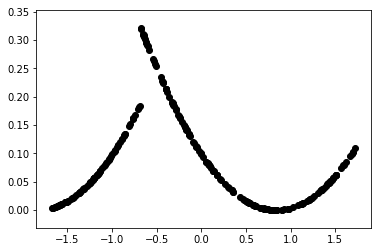

In [62]:
coef = regr.coef_
intercept = regr.intercept_
intercept
#coef[0]
err = np.zeros(len(X_test))

for i in range (0,len(X_test)):
    err[i] = math.pow(Y_test[i] - (coef*X_test[i] + intercept),2)
    
plt.scatter(X_test, err,  color='black')

plt.show()

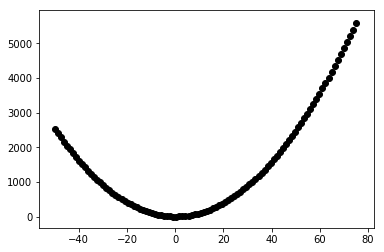

In [63]:
mediaS=np.mean(err, axis=0)
mediaS

arr = np.zeros((100,2))

#Parametros a mover para ver el minimo de la curva
w = np.linspace(-50,75,100)

errN = np.zeros(len(X_test))
i=0.0
aux = 0

while(i<100.0):
    arr[aux][0] = w[aux]
    for j in range (0,len(X_test)):
        errN[j] = math.pow(Y_test[j] - (coef*X_test[j] + arr[aux][0]),2)
    arr[aux][1]=np.mean(errN, axis=0)
    i = i+1.0
    aux = aux + 1

for i in range(0,len(arr)):
    x_err = arr[i][0]
    y_err = arr[i][1]
    plt.scatter(x_err, y_err,  color='black')



plt.show()


   